In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Datasets

rai_old = pd.read_csv('Dataset/rai_old_share.csv') #Release Assistance Indicator
rai_new = pd.read_csv('Dataset/rai_new_share.csv')
rtt = pd.read_csv('Dataset/rtt_share.csv') #Round Trip Time
psm = pd.read_csv('Dataset/PSM_share.csv') #inactive periods of PTW / DRX or PSM
connected = pd.read_csv('Dataset/connected_share.csv') #device waits duration of inactivity timer before going IDLE
idrx_on = pd.read_csv('Dataset/IDRX_ON_share.csv') #listen for paging occasions during IDLE mode DRX.
rai = rai_new.append(rai_old, ignore_index=True)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2722: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
print(rai.columns)
print(idrx_on.columns)
print(rtt.columns)
print(psm.columns)
print(connected.columns)


Index(['measurement_id', 'con_idle_stateNumber', 'state', 'energyConsumption',
       'ms', 'tx_power_median', 'current_max', 'rssi_median', 'rtt_median',
       'rsrp_median', 'ECL_median', 'code', 'Location Coverage',
       'ExpectedResponse', 'timestampUETransmission', 'timestampServerCapture',
       'failure_direction', 'energyConsumptionTx', 'msTx', 'date', 'duration',
       'module', 'operator', 'interval', 'psize', 'site', 'active_timer',
       'tau', 'note', 'operator_humanReadable', 'Packet Size [Bytes]',
       'Throughput'],
      dtype='object')
Index(['measurement_id', 'con_idle_stateNumber', 'state', 'energyConsumption',
       'ms', 'current_max', 'snr_mostCommon', 'ECL_mostCommon',
       'rsrp_mostCommon', 'rsrq_mostCommon', 'Location Coverage', 'date',
       'duration', 'module', 'operator', 'interval', 'psize', 'site',
       'active_timer', 'tau', 'note', 'operator_humanReadable'],
      dtype='object')
Index(['measurement_id', 'con_idle_stateNumber', 'rtt', 'E

In [3]:
#First Dataset Columns
#Merge Common Columns to obtain Dataset
print('Before Merge: ',connected.shape,idrx_on.shape,rai.shape)
data_no_tx = pd.concat([connected,idrx_on,rai], join = 'inner', ignore_index=True)
data_no_tx.drop(columns=['current_max','tau','measurement_id','con_idle_stateNumber','state','module','operator','note','operator_humanReadable','site','date'],inplace=True,axis=0)
print('After Merge: ',data_no_tx.columns)


#Second Dataset Columns
#Merge Common Columns to obtain Dataset
print('Before Merge: ',connected.shape,rai.shape)
data_tx = pd.concat([connected,rai], join = 'inner', ignore_index=True)
data_tx.drop(columns=['measurement_id','tau','current_max','rssi_median','rtt_median','rsrp_median','ExpectedResponse','con_idle_stateNumber','state','module','operator','note','operator_humanReadable','site','date','timestampUETransmission', 'timestampServerCapture','failure_direction'],inplace=True,axis=0)
print('After Merge: ',data_tx.columns)


Before Merge:  (6013, 31) (52764, 22) (2515, 32)
After Merge:  Index(['energyConsumption', 'ms', 'Location Coverage', 'duration', 'interval',
       'psize', 'active_timer', 'tau'],
      dtype='object')
Before Merge:  (6013, 31) (2515, 32)
After Merge:  Index(['energyConsumption', 'ms', 'tx_power_median', 'Location Coverage',
       'energyConsumptionTx', 'msTx', 'duration', 'interval', 'psize',
       'active_timer', 'tau', 'Packet Size [Bytes]', 'Throughput'],
      dtype='object')


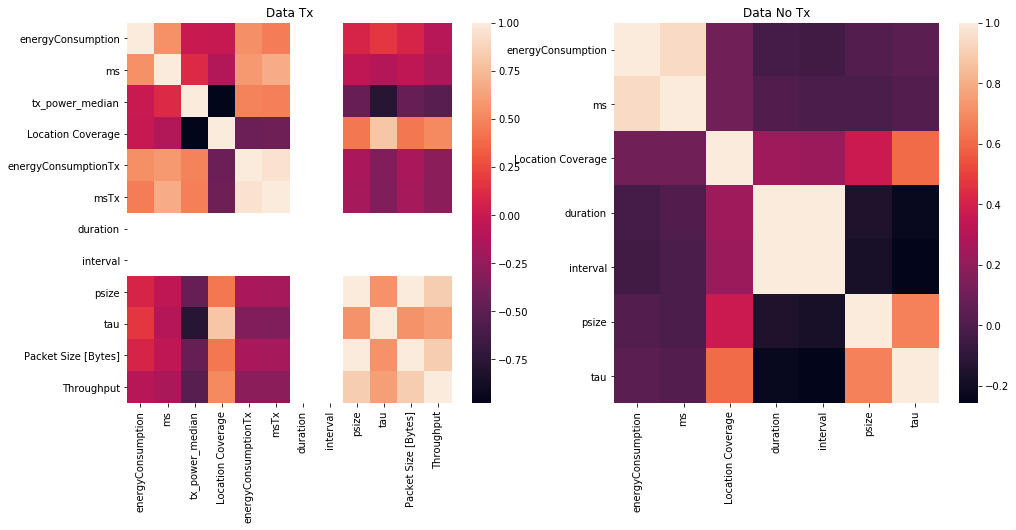

In [11]:
#Visualise Data

#Heat Maps
plt.figure(1,figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Data Tx')
sns.heatmap(data_tx.corr())

plt.subplot(1,2,2)
plt.title('Data No Tx')
sns.heatmap(data_no_tx.corr())

plt.show()

In [4]:
#Check For NaN Valus

# print(data_no_tx.isnull().any())
# print(data_tx.isnull().any())

#Change Location Coverage to Numeric Values

Location_map = {"Good":1,"Okay":0,"Bad":-1}

data_tx['Location Coverage'] = data_tx['Location Coverage'].map(Location_map).fillna(0)
data_no_tx['Location Coverage'] = data_no_tx['Location Coverage'].map(Location_map).fillna(0)

#Remove NaN Values



#Drop NaN Values (TEMP)

data_no_tx = data_no_tx.dropna()
data_tx = data_tx.dropna()

data_no_tx.to_csv('Dataset/data_no_tx.csv')
data_tx.to_csv('Dataset/data_tx.csv')

print(data_tx.shape,data_no_tx.shape)

(687, 13) (12690, 8)
